# Python Project - Boston Housing Dataset

## Setup and read in data

In [273]:
## Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

## Seaborn plot settings
#sns.set(rc={'figure.figsize':(11.7,8.27),"font.size":15,"axes.titlesize":20,"axes.labelsize":15},style="white") 
sns.set(rc={"font.size":15,"axes.titlesize":20,"axes.labelsize":15},style="white") 
## Read in data
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)


## Data visualisations

### Examine the distribution of the median value of owner-occupied homes

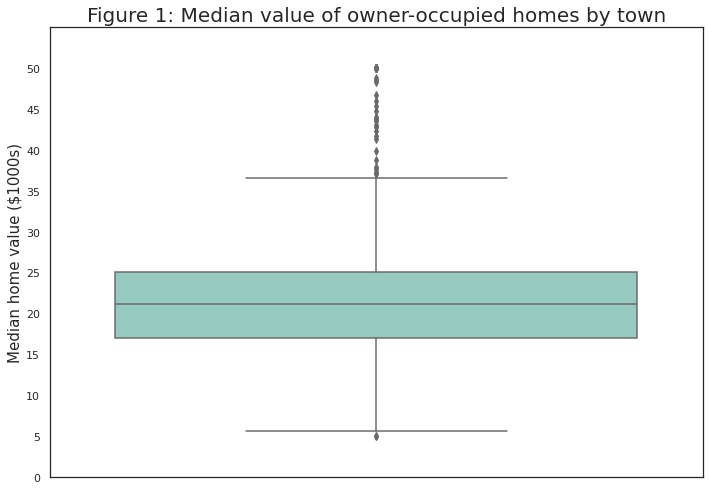

In [274]:
### 1. Generate boxplot of "Median value of owner-occupied homes"
box_medv = sns.boxplot(y="MEDV", data=boston_df, palette = "Set3")
box_medv.set_ylabel("Median home value ($1000s)")
box_medv.set_title("Figure 1: Median value of owner-occupied homes by town")
box_medv.set_ylim(0,55)
box_medv.set_yticks(range(0,55,5))
plt.show()

**Explanation of Figure 1:** 
The median value of owner-occupied homes by town ranges from \\$5000 to \\$50,000, with a median of about \\$21,000. Median values above around \\$36,000 appear to be outliers. The interquartile range for this variable is about \\$8,000, that is, the middle 50% of the data is between about \\$17,000 and \\$25,000.


### Examine the distribution of median owner-occupied home values by Charles River boundary

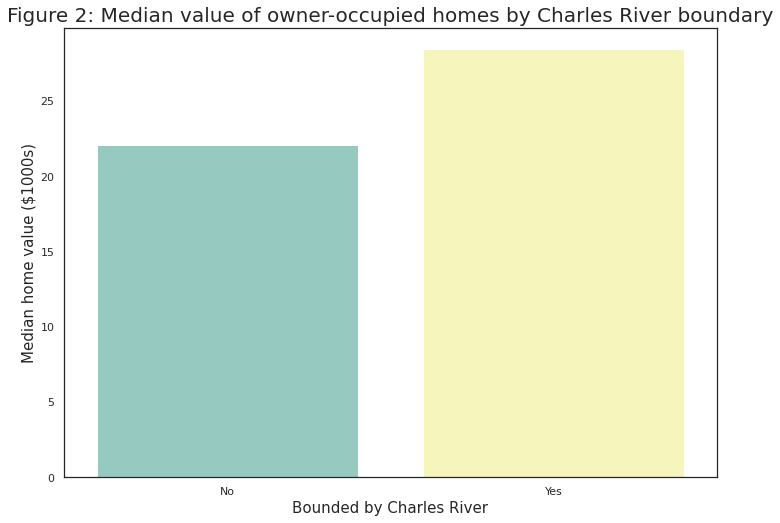

In [275]:
### 2. Generate bar plot of median owner-occupied home values by "Charles River" variable
bar_criver = sns.barplot(x="CHAS", y="MEDV", data=boston_df, palette = "Set3",ci=None)
bar_criver.set_xlabel("Bounded by Charles River")
bar_criver.set_ylabel("Median home value ($1000s)")
bar_criver.set_title("Figure 2: Median value of owner-occupied homes by Charles River boundary")
bar_criver.set_xticklabels(['No','Yes'])
plt.show()


**Explanation of Figure 2:** 
The median value of owner-occupied homes by town is higher among towns that are bounded by the Charles River.

### Examine the distribution of median owner-occupied home values by age group

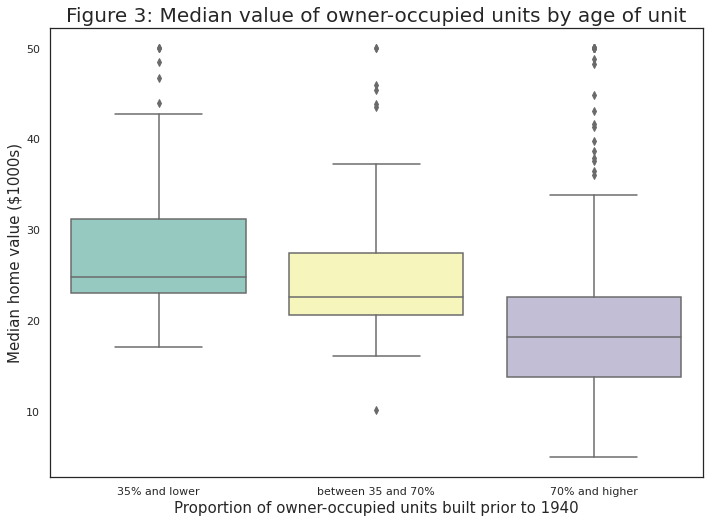

In [276]:
### 3. Generate boxplot of median owner-occupied home values by age of dwelling
## Discretize age group variable into three groups (<=35, >35 to < 70, 70+)
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35% and lower'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70%'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70% and higher'

## Generate box plot
box_age = sns.boxplot(x='age_group', y='MEDV', data=boston_df, palette="Set3", order=["35% and lower","between 35 and 70%", "70% and higher"])
box_age.set_xlabel("Proportion of owner-occupied units built prior to 1940")
box_age.set_ylabel("Median home value ($1000s)")
box_age.set_title("Figure 3: Median value of owner-occupied units by age of unit")
plt.show()

**Explanation of Figure 3:** 
The median value of owner-occupied homes is lowest for those towns with the highest proportion of older owner-occupied units, that is, those built prior to 1940.

### Examine the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

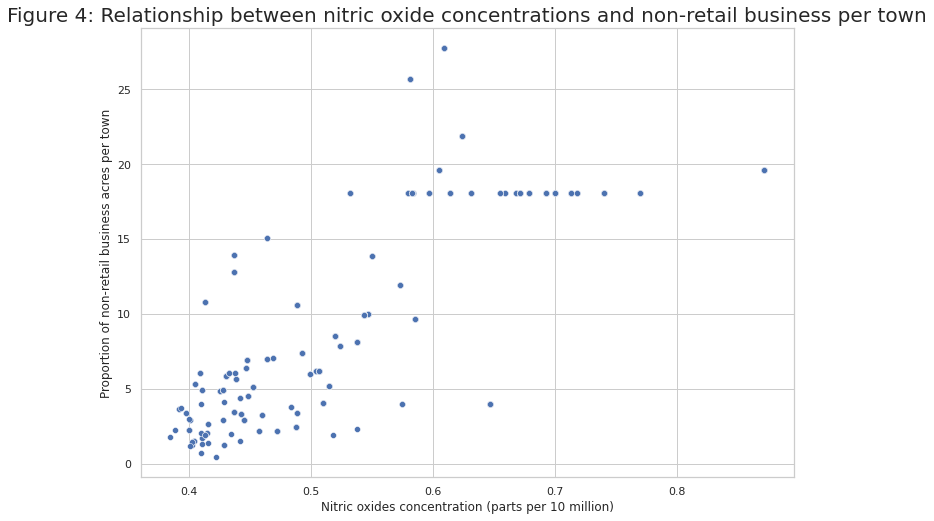

In [277]:
### 4. Generate scatter plot of nitric oxide concentrations by proportion of non-retail business acres
sns.set(style="whitegrid") 
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
ax.set_xlabel("Nitric oxides concentration (parts per 10 million)")
ax.set_ylabel("Proportion of non-retail business acres per town")
ax.set_title("Figure 4: Relationship between nitric oxide concentrations and non-retail business per town",size=20)
plt.show()


**Explanation of Figure 4:** 
There appears to be a positive linear relationship between nitric oxide concentrations and the proportion of non-retail business acres per town. That is, higher concentrations appear to be associated with areas that have a higher proportion of non-retail businesses.

### Examine the distribution of the pupil-teacher ratio by town

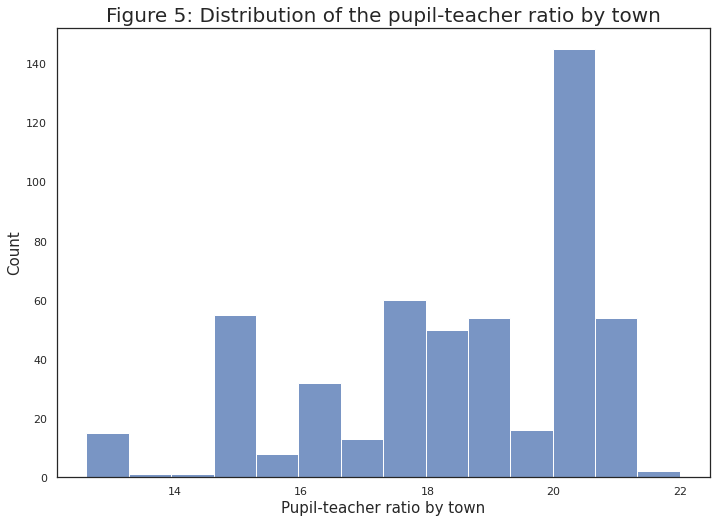

In [278]:
### 5. Generate histogram of the pupil to teacher ratio variable
sns.set(style="white") 
hist = sns.histplot(x='PTRATIO',data=boston_df)
hist.set_xlabel("Pupil-teacher ratio by town",size=15)
hist.set_ylabel("Count", size=15)
hist.set_title("Figure 5: Distribution of the pupil-teacher ratio by town", size=20)
plt.show()

**Explanation for Figure 5:**
The distribution of pupil-teacher ratio by town is skewed to the left. The most common ratio of pupils to teachers by town is around 20.

## Statistical Tests

### Question 1. Is there a significant difference in median value of houses bounded by the Charles river or not? 

**Test performed: T-test for independent samples** <br>
Null hypothesis: The mean median value of houses for towns bounded by the Charles River is equal to the mean median value of houses for towns that are not bounded by the Charles river. <br>
Alternative hypothesis: The mean median value of houses for towns bounded by the Charles River is not equal to the mean median value of houses for towns that are not bounded by the Charles river.

In [279]:
# Test for equality of variances of MEDV between CHAS groups
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')


LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

Since the resulting p-value for the Levene's test is less than alpha value of 0.05, we cannot assume equality of variance (set equal_var to False in next step).

In [280]:
# Perform the t-test
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                  boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = False)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a significant difference in median owner-occupied house values based on whether they are bounded by the Charles River or not.

### Question 2.  Is there a difference in median value of houses for each proportion of owner occupied units built prior to 1940? 

**Test performed: ANOVA** <br>
Note that the AGE variable will be groups into three categories (age_group) as per above, as the one-way ANOVA cannot work with a continuous variable.

Null hypothesis: The mean median value of houses is equal across all three "proportion of owner occupied units built prior to 1940" groups (35% or less, 35 to 70%, 70% or higher). <br>
Alernative hypothesis: At least one of the means differ across the three groups.

In [281]:
# Test for equality of variances of MEDV amoung age_group groups
scipy.stats.levene(boston_df[boston_df['age_group'] == '35% and lower']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70%']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70% and higher']['MEDV'],
                   center='mean')



LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)

Since the resulting p-value for the Levene's test is greater than alpha value of 0.05, we can assume equality of variance.

In [282]:
# Perform the ANOVA
f_statistic, p_value = scipy.stats.f_oneway(boston_df[boston_df['age_group'] == '35% and lower']['MEDV'], 
                                           boston_df[boston_df['age_group'] == 'between 35 and 70%']['MEDV'], 
                                           boston_df[boston_df['age_group'] == '70% and higher']['MEDV'])
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is evidence that there is a significant difference in the mean median house value across at least one of the "proportion of owner occupied units built prior to 1940" groups (35% or less, 35 to 70%, 70% or higher).

### Question 3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? 

**Test performed:** Pearson Correlation <br>
Null hypothesis: Nitric oxide concentration is not correlated with the proportion of non-retail business acres per town. <br>
Alternative hypothesis: Nitric oxide concentration is correlated with the proportion of non-retail business acres per town.

In [283]:
# Perform the Pearson Correlation between NOX and INDUS
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209151, 7.913361061238693e-98)

**Conclusion:** Since the p-value  (Sig. (2-tailed) is less than the alpha value 0.05, we reject the null hypothesis and conclude that there  exists a relationship between nitric oxide concentrations and proportion of non-retail business acres per town.

### Question 4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

**Test performed**: Regression analysis <br>
Null hypothesis: β1 = 0 (no relationship between weighted distance to the five Boston employment centres and the median value of owner-occupied homes) <br>
Alternative hypothesis: β1 ≠ 0 (there is a relationship between weighted distance to the five Boston employment centres and the median value of owner-occupied homes) <br>


In [284]:
## Perform the linear regression
# Independent variable: DIS
# Dependent variable: MEDV

## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 20 Jun 2022   Prob (F-statistic):           1.21e-08
Time:                        23:46:49   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion**: As the p-value is less than the alpha value 0.05, we can conclude that this is a statistically signficant relationship between the weighted distance to the five Boston employment centres and the median value of owner-occupied homes. When the weighted distance goes up by 1, the median value of owner-occupied homes increases by about 1 unit ($1,000).